# Detects breast cancer

Avec environ 54 062 nouvelles personnes touchées chaque année, le cancer du sein est le plus répandu des cancers féminins mais également masculin. Près d'une femme sur neuf sera concernée au cours de sa vie, le risque augmentant avec l'âge. Moins de 10% des cancers du sein surviennent avant 40 ans. L’incidence augmente ensuite régulièrement jusqu’à 65 ans. 
Après avoir doublé entre 1980 et 2005, l'incidence semble désormais en phase de stabilisation. Plus encourageant encore, la mortalité (nombre de décès/an) n'a, elle, pas augmenté depuis les années 80. Le résultat d'énormes progrès, tant au niveau du dépistage que de la prise en charge médicale de la maladie. Pour preuve, aujourd'hui, plus de 3 cancers du sein sur 4 sont guéris en sachant que tous les types de cancers n’ont pas le même pronostic ! Ces scores encourageants sont le fruit de l’effort de la médecine préventive mais également de la capacité du corps médical à prendre en charge rapidement les patients. Ce sujet vous touche particulièrement et vous souhaitez aider le corps médical dans son processus de dépistage. 
Ce matin vous avez décidé de développer un classifieur vous permettant d’identifier rapidement la gravité du cancer et ainsi de distinguer si les cellules cancéreuses sont bénignes ou malignes. 


Le dataset initial a été créé dans le but de prédire si les cellules cancéreuses sont bénignes ou malignes.


Cet ensemble de données provient de Original Wisconsin Breast Cancer Database

### description : This program detects breast cancer, based off of data

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from itertools import cycle
from sklearn import svm, datasets
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
%matplotlib inline

## 1.Réaliser l'analyse exploratoire des données

In [2]:
#Load the data


df = pd.read_csv('data.csv')
df
#M maligne
#B bénine

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df = df.dropna(axis=1)

In [6]:
df.shape

(569, 32)

In [7]:
#permet d'avaoir le nombre d'ittération sur la variable diagnosis
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

/home/fatimam/anaconda3/envs/my_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

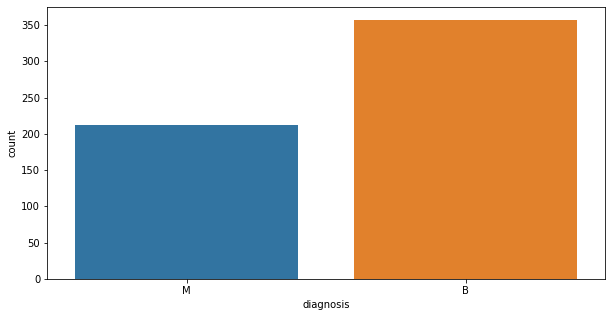

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(df['diagnosis'], label= 'count')

In [9]:
#df.dtypes

## Visualisation des données

In [10]:
#encodage de la colonne diagnosis
labelencoder_Y= LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)
df.iloc[:,1]
#0 remplace bénin
#1 remplace malin

/home/fatimam/anaconda3/envs/my_env/lib/python3.9/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

<Figure size 1800x1440 with 0 Axes>

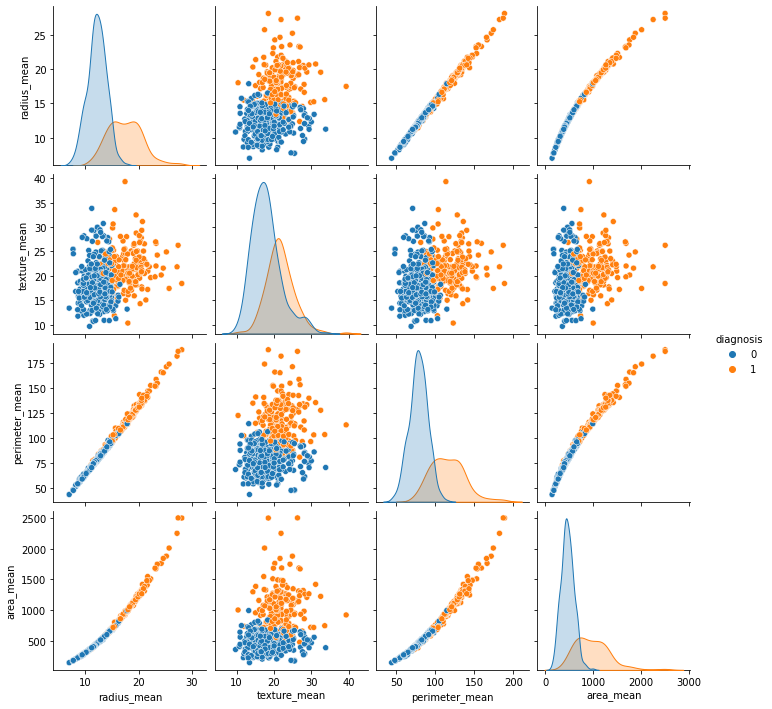

In [11]:
plt.figure(figsize=(25,20))
sns.pairplot(df.iloc[:,1:6], hue = 'diagnosis')

In [12]:
#correlation des colomnes
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


<AxesSubplot:>

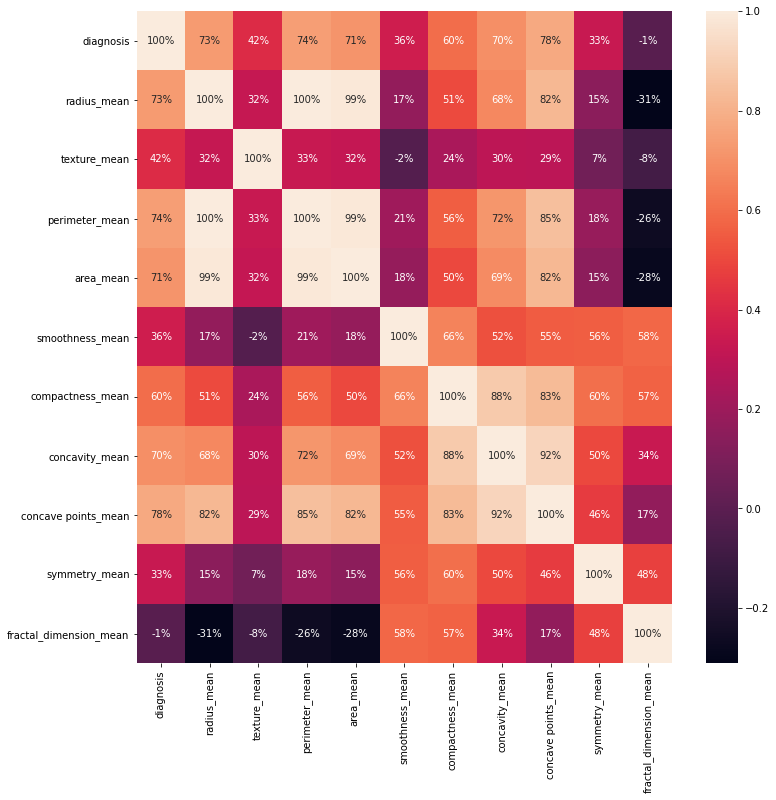

In [13]:
#Visualisation de la correlation
plt.figure(figsize=(12,12))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True, fmt='.0%')

# Génération d'un modèle

In [14]:
#Split du dataset
X= df.iloc[:,2:31]
y= df.iloc[:,1]

## Utilisation de KNN sans StandardScaler

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

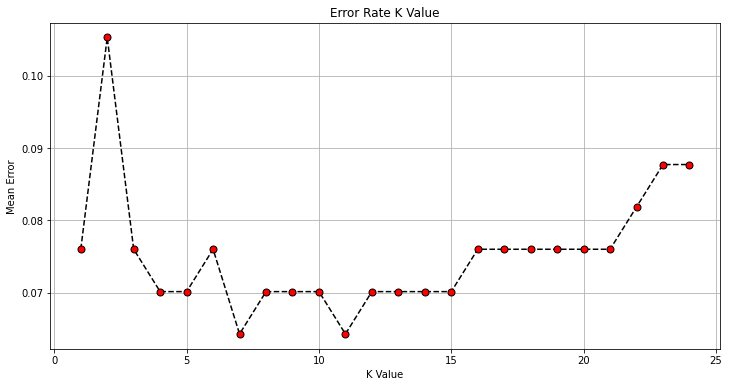

In [16]:
error = []

# Calcul du taux d'erreur avec la valeur K entre 1 et 25
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1,25), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=7)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid(1)


## kNN avec différentes valeurs de k , affiche de la matrice de confusion  et métriques de classification sans StandardScaler

In [17]:
from scipy.stats import zscore
def k_number(k):
    classifier = KNeighborsClassifier(n_neighbors=k, weights = 'distance')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("KNN is predicting at {0:2}%".format(classifier.score(X_test, y_test)*100))
    print(confusion_matrix(y_test, y_pred))
    return y_pred


In [18]:
print(classification_report(y_test,k_number(3)))

KNN is predicting at 92.39766081871345%
[[103   5]
 [  8  55]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       108
           1       0.92      0.87      0.89        63

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



In [19]:
print(classification_report(y_test,k_number(5)))

KNN is predicting at 93.56725146198829%
[[104   4]
 [  7  56]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       108
           1       0.93      0.89      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [20]:
print(classification_report(y_test,k_number(7)))

KNN is predicting at 94.73684210526315%
[[104   4]
 [  5  58]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       108
           1       0.94      0.92      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [21]:
print(classification_report(y_test,k_number(10)))

KNN is predicting at 94.15204678362574%
[[104   4]
 [  6  57]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



## Affichage du score de précision en fonction de k sans StandardScaler

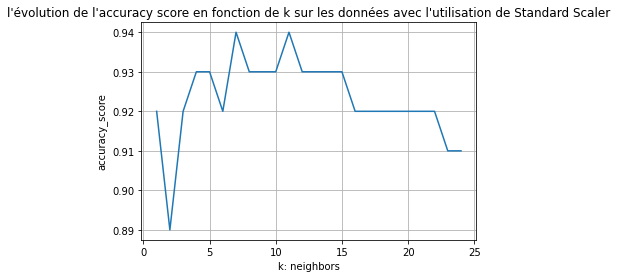

In [22]:
from sklearn.metrics import accuracy_score
liste_k = range(1,25,1)
score = []
def KNN_score(liste_k):
    for k in liste_k:
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        metrics.accuracy_score(y_test, y_pred)
        score.append(round(accuracy_score(y_test, y_pred),2))
    return score
KNN_score(liste_k)


fig,ax = plt.subplots()
ax.plot(liste_k,score)

ax.set(xlabel='k: neighbors', ylabel = "accuracy_score",title= "l'évolution de l'accuracy score en fonction de k sur les données avec l'utilisation de Standard Scaler")
ax.grid()
plt.show()


## Validation croisée en fonction de k sans StandardScaler

'val_score_mean = 0.950684335443038'

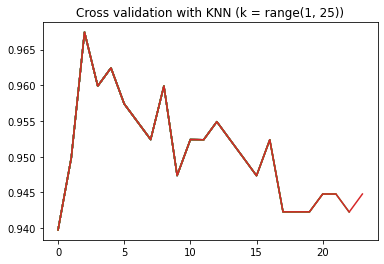

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

K=range(1,25)
def cross_val(K):
    val_score=[]
    for k in K:
        score =cross_val_score(KNeighborsClassifier(k),X_train, y_train, cv=5, scoring='accuracy').mean()
        val_score.append(score) 
        val_mean = (np.array(val_score)).mean()
        val_std = (np.array(val_score)).std()
        plt.plot(val_score)
        plt.grid()
        plt.title('Cross validation with KNN (k = {})'.format(K))
    return 'val_score_mean = {}'.format(val_mean)

cross_val(K)


# Utilisation de KNN avec standardisation avec Standard Scaler

## Création  du modele 

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Calcul du taux d'erreur en fonction de K voisins entre 1 et 25

In [49]:
error = []


for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    



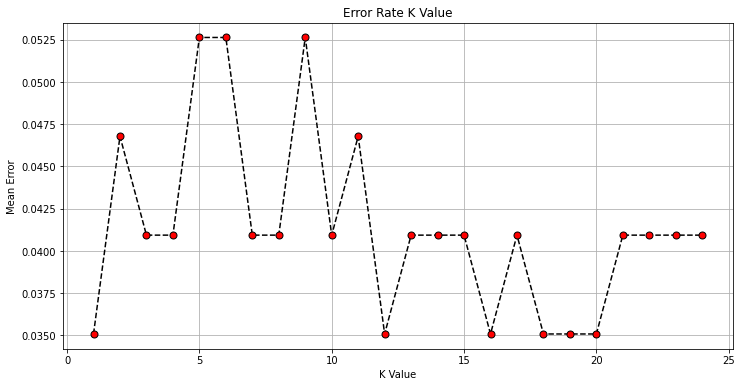

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,25), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=7)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid(1)

À partir de ce graphique , on peut voir que les valeurs de K qui ont un taux proche de 0 sont 2,4,15 donc les K qui donneront les meilleures scores

## kNN avec différentes valeurs de k , affiche de la matrice de confusion  et métriques de classification avec StandardScaler

In [27]:
from scipy.stats import zscore
def k_number(k):
    classifier = KNeighborsClassifier(n_neighbors=k, weights = 'distance')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("KNN is predicting at {0:2}%".format(classifier.score(X_test, y_test)*100))
    print(confusion_matrix(y_test, y_pred))
    return y_pred


In [28]:
print(classification_report(y_test,k_number(2)))

KNN is predicting at 96.49122807017544%
[[106   2]
 [  4  59]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [29]:
print(classification_report(y_test,k_number(5)))

KNN is predicting at 94.73684210526315%
[[105   3]
 [  6  57]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [30]:
print(classification_report(y_test,k_number(9)))

KNN is predicting at 94.73684210526315%
[[104   4]
 [  5  58]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       108
           1       0.94      0.92      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [31]:
print(classification_report(y_test,k_number(15)))

KNN is predicting at 95.90643274853801%
[[106   2]
 [  5  58]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



## Affichage du score de précision en fonction de k avec StandardScaler

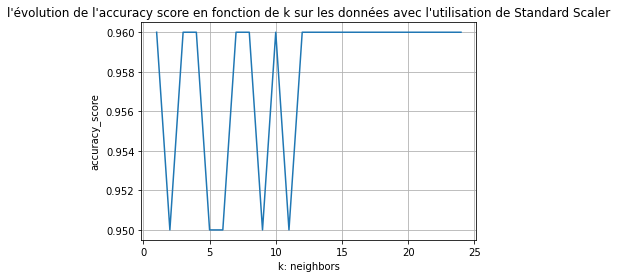

In [32]:
from sklearn.metrics import accuracy_score
liste_k = range(1,25)
score = []
def KNN_score(liste_k):
    for k in liste_k:
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        metrics.accuracy_score(y_test, y_pred)
        score.append(round(accuracy_score(y_test, y_pred),2))
    return score
KNN_score(liste_k)


fig,ax = plt.subplots()
ax.plot(liste_k,score)

ax.set(xlabel='k: neighbors', ylabel = "accuracy_score",title= "l'évolution de l'accuracy score en fonction de k sur les données avec l'utilisation de Standard Scaler")
ax.grid()
plt.show()





## Validation croisée en fonction de k avec StandardScaler

('val_score_mean = 0.9509994725738397', 'val_score_std = 0.007721637423148121')

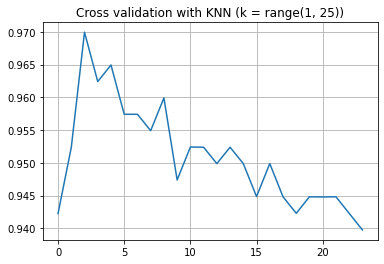

In [33]:
from sklearn.pipeline import Pipeline
K=range(1,25)
def cross_val_scaler(K):
    val_score = []
    for k in K:
        pipe = Pipeline([('scaler', StandardScaler()), ('KNN', KNeighborsClassifier(n_neighbors=k))])
        pipe.fit(X_train, y_train)
        e_val = scorcross_val_score(pipe, X_train, y_train, cv=5,  scoring='accuracy').mean()
        val_score.append(score_val)
    val_mean = (np.array(val_score)).mean()
    val_std = (np.array(val_score)).std()
    #print(val_mean)
    plt.plot(val_score)
    plt.grid()
    plt.title('Cross validation with KNN (k = {})'.format(K))
    return 'val_score_mean = {}'.format(val_mean),  'val_score_std = {}'.format(val_std)

cross_val_scaler(K)

## Courbe ROC et comparaison AUC en fonction du modèle de classification

### Feature Scaling 

In [34]:
X= df.iloc[:,2:31]
y= df.iloc[:,1]

In [57]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## SVM Classifier

In [70]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state = 5)
model_SVC.fit(X_train,y_train)
y_pred_svm = model_SVC.decision_function(X_test)

## Logistic Classifier 

In [71]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train,y_train)
y_pred_logistic = model_logistic.decision_function(X_test)

## Knn Classifier

In [72]:
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

## Courbe ROC 

In [73]:
logistic_fpr,logistic_tpr,threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr,logistic_tpr)

svm_fpr,svm_tpr,threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr,svm_tpr)

knn_fpr,knn_tpr,threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr,knn_tpr)


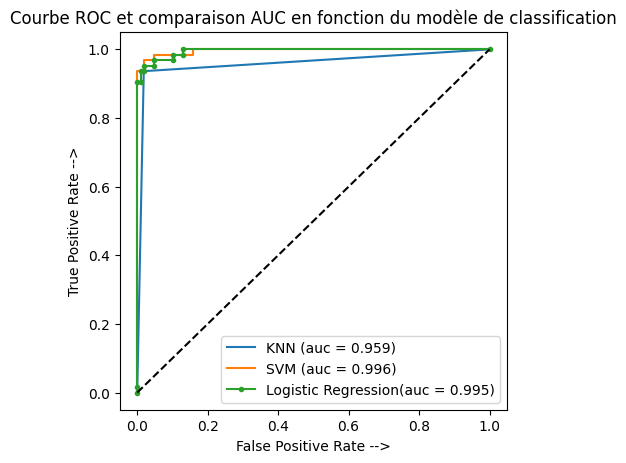

In [77]:
plt.figure(figsize =(5,5),dpi=100)
plt.plot(knn_fpr,knn_tpr,label = 'KNN (auc = %0.3f)'% auc_knn)
plt.plot(svm_fpr,svm_tpr,linestyle='-',label = 'SVM (auc = %0.3f)'% auc_svm)
plt.plot(logistic_fpr,logistic_tpr,marker='.',label = 'Logistic Regression(auc = %0.3f)'% auc_logistic)
plt.plot([0,1],[0,1], 'k--')

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('Courbe ROC et comparaison AUC en fonction du modèle de classification'.format(K))

plt.legend()

plt.show()


In [ ]:
Conclusion :